In [48]:
%matplotlib inline
import scipy.integrate as integrate # get the ODE module
import matplotlib.pyplot as plt # plotting module
import numpy as np # numpy module

import matplotlib.pylab as pylab

# Week 6: Solving Initial Value Ordinary Differential Equations

## Part 1: First Order ODEs


Many problems in Geosciences can be written in the form of
differential equations. 

This session aims to introduce you to basic ideas about numerically
solving Ordinary Differential Equations (ODEs) and implementing these in Python.



## What is an ODE?

- In mathematics, an ordinary differential equation (ODE) is a differential equation containing one or more functions of one independent variable and its derivatives. 
- The term ordinary is used in contrast with the term partial differential equation which may be with respect to more than one independent variable.

# 1. General approaches for solving ODEs

## 1.1 Analytic Solutions to ODEs (See the math part of this course)

For example, if we look for an analytic solution to

$$\frac{dy}{dt} = t$$


We can integrate this to get,

$$y=\frac{t^2}{2} + C_1$$



Easy. And we can evaluate this at **ANY** $t$.

In this sense, it is a _continuous solution_.

## 1.2 Analytic solutions to ODEs with Python: Symbolic Math

Symbolic Mathematics: Using computers to find analytic solutions: Like the math part

Where computers find these analytic solutions - this is called Symbolic Computation. 

For example, [Wolfram Alpha](http://www.wolframalpha.com) or the [Symbolic Mathematics in Python (Sympy)](http://www.scipy-lectures.org/advanced/sympy.html) module. 

This is not the type of computing we consider in this session.

As a quick example of the above,

In [49]:
# Use Sympy to integrate dy/dt=t

import sympy
t = sympy.Symbol('t')

y = sympy.integrate(t, t)

print("y = ",y)

y =  t**2/2


- Note that this does not include the constant of integration
- Again, this can be evaluated anywhere.

---

## 1.3 Numerical solution of 1st order ODEs using `odeint`

The example above was trivial and could be solved analytically, most real world problems cannot be solved in this way.

###   `scipy.integrate.odeint`

Scipy provides the function `scipy.integrate.odeint` which can
  use a variety of solvers to solve 1st order ODEs.

  `odeint` is run as
  `y=scipy.integrate.odeint(fn,yo,t)` where:

- `fn`: is the function you want to solve corresponding to $dy/dt=$ `fn(y,t)`. 
- `fn`: should be a function of $y$ and $t$ i.e. `fn(y,t)`.
- `t`: specifies the times you want solution values for.
- `y0`: are the initial conditions.
- `args`: You can provide other arguments for `odeint` including additional arguments for the function to be solved. 

We'll see this later in the course.

_ASIDE: A video tutorial can be found here: https://www.youtube.com/watch?v=VV3BnroVjZo_

### 1.3a EXAMPLE: Solve $\frac{dy}{dt}=t$ using `odeint`

Intgrate $\frac{dy}{dt}=t$ over the timerange 0 to 10 with an inital value of $y(t=0) = 0.1$

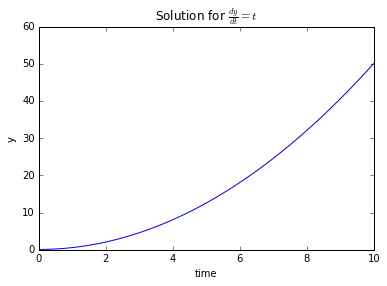

In [50]:
import scipy.integrate as integrate # get the ODE module

# 1. Define the function you want to integrate
def dy_dt(y,t):
  """ Simple function to illustrate use of scipy.integrate.ode for the problem dy/dt=t """
  return (t)

# 2. Specify the arguments for the integration
time  = np.linspace(0,10,100)  # Time range to integrate over
yinit = np.array(0.1)          # Initial value (the starting point for the integration)

# 3. Perform the integration
y=integrate.odeint(dy_dt,yinit,time)

# 4. Plot the results
plt.plot(time,y)
plt.xlabel('time')    ;    plt.ylabel('y')
plt.title(r'Solution for $\frac{dy}{dt}=t$')

### 1.3b Same problem using a lambda function

Lambda functions are a short-hand way of writing a fuction that its onto one line!

_ONLINE LEARNING: See Chapter 3 of the (https://www.datacamp.com/courses/python-data-science-toolbox-part-1)[Python for Data Science Toolbox Part 1] on DataCamp._

In [1]:
dy_dt_lambda = lambda y,t: t

time = np.linspace(0,10,100)
yinit = np.array(0.1)          # Initial value (the starting point for the integration)

y = integrate.odeint(dy_dt_lambda, yinit, time)

plt.plot(time, y)
plt.xlabel('time')    ;    plt.ylabel('y(t)')
plt.title(r'Solution for $\frac{dy}{dt}=t$ using Lambda functions')

NameError: name 'np' is not defined

### ASIDE: Standard and lambda functions

"Comprehensive" vs "One liners"

In [52]:
# Standard function

def dy_dt_standard(y,t):
  """ 
  Simple function to illustrate use of 
  scipy.integrate.ode for the problem dy/dt=t 
  """
  return (t)

In [53]:
# Lambda functions - 1 liners!

dy_dt_lambda = lambda y,t: t

---

## 1.4 'odeint' to solve a model with a time dependent term

Solve $$\frac{dy}{dt} = \frac{y(t) + u(t)}{5}$$

Where

$u = 0$ if $t<10$

and

$u = 2$ if $t \ge 10$

So the function we want to integrate now needs to have a term that changes depending upon the time.

Look at how we do this below:

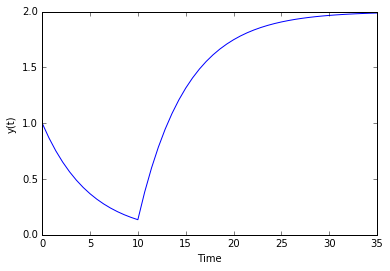

In [54]:
def dy_dt(y,t):
    if( t<10. ):
        u = 0.
    else:
        u = 2.
    dydt = ( -y + u ) /5.
    return dydt

y0 = 1
t  = np.linspace(0,35)

y = integrate.odeint(dy_dt, y0, t)

plt.plot(t,y)
plt.xlabel('Time')
plt.ylabel('y(t)')


---

# 2. EXERCISES: Solving 1st order ODEs using `odeint`

## Exercise 2.1: Integration with `odeint`

Use `odeint` to solve,

$\frac{dy}{dt}= -y\sqrt(t)$ with $y(0)=1$ for $t\in(0,5)$

In [59]:
## YOUR ANSWER GOES HERE

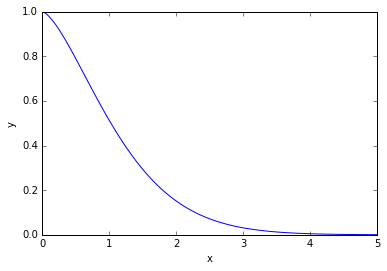

In [60]:
## ANSWER

# Define a function which calculates the derivative
def dy_dt(y, t):
    return - y * np.sqrt(t)

times = np.linspace(0,5,100)
y0 = 1.0
y = integrate.odeint(dy_dt, y0, times)

plt.plot(times, y)
plt.xlabel("x")
plt.ylabel("y")

---

##  2.2 Exercise: More integration with `odeint`

Use `odeint` to solve,
$$\frac{dy}{dx}+y=x$$

with the initial value of $y(x=0)=1$ over the range $x=0$ to 5.

In [61]:
## YOUR ANSWER GOES HERE

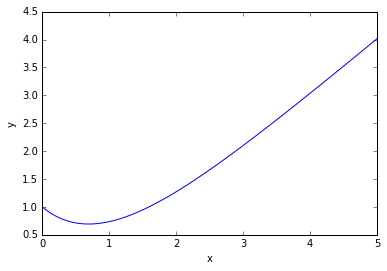

In [62]:
## ANSWER

# Define a function which calculates the derivative
def dy_dx(y, x):
    return x - y

x = np.linspace(0,5,100)
y0 = 1.0
y = integrate.odeint(dy_dx, y0, x)

plt.plot(x, y)
plt.xlabel("x")
plt.ylabel("y")

The closed form solution to this equation is:
    $$y = x -1 +2e^{-x}$$
    
Compare the numerical solution with the analytical solution by showing both on the same plot.

In [63]:
## YOUR ANSWER GOES HERE

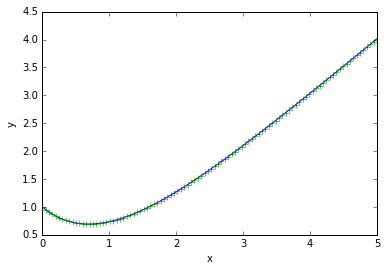

In [64]:
## ANSWER

y_exact = x - 1 + 2*np.exp(-x)
y_difference = y - y_exact
plt.plot(x, y)
plt.plot(x, y_exact, "+")
plt.xlabel("x")
plt.ylabel("y")

We can compare the difference in the solutions by directly plotting the difference.

In [65]:
## YOUR ANSWER GOES HERE

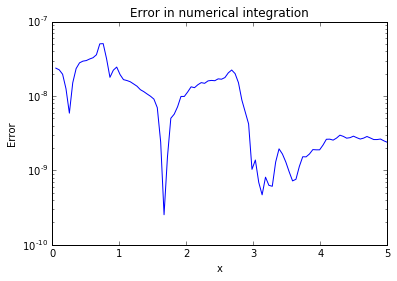

In [66]:
## ANSWER

y = np.reshape(y, np.shape(y_exact))

y_diff = np.abs(y_exact - y)
plt.semilogy(x, y_diff)
plt.ylabel("Error")
plt.xlabel("x")
plt.title("Error in numerical integration");